Imports

In [0]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

Carregando o dataset

In [0]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()


Exploração dos dados

In [3]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

Exibição dos dados

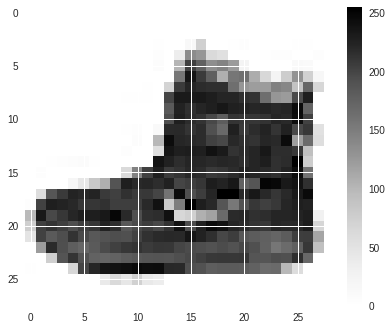

In [4]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.colorbar()

Normalizando as imagens

In [0]:
imagens_treino = imagens_treino/float(255)

Criando, compilando, treinando e normalizando o modelo

In [6]:
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 9s 189us/step - loss: 0.5252 - acc: 0.8134 - val_loss: 0.4049 - val_acc: 0.8524
Epoch 2/5
48000/48000 [==============================] - 9s 183us/step - loss: 0.3959 - acc: 0.8569 - val_loss: 0.3694 - val_acc: 0.8693
Epoch 3/5
48000/48000 [==============================] - 9s 182us/step - loss: 0.3605 - acc: 0.8683 - val_loss: 0.3779 - val_acc: 0.8627
Epoch 4/5
48000/48000 [==============================] - 9s 183us/step - loss: 0.3377 - acc: 0.8757 - val_loss: 0.3443 - val_acc: 0.8755
Epoch 5/5
48000/48000 [==============================] - 9s 182us/step - loss: 0.3209 - acc: 0.8805 - val_loss: 0.3495 - val_acc: 0.8765


Sumário do modelo

In [38]:
sumario_do_modelo = modelo.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


Pesos da primeira camada Dense

In [40]:
pesos_camada_dense = modelo.layers[1].get_weights()
pesos_camada_dense

[array([[ 0.00524871, -0.11004062,  0.13758828, ..., -0.1579878 ,
         -0.00142127,  0.00939471],
        [ 0.03461614, -0.04760416,  0.1779013 , ..., -0.14755748,
         -0.10598074, -0.05744827],
        [-0.04720343,  0.01652463, -0.03128776, ..., -0.13856664,
          0.01710287, -0.05725543],
        ...,
        [ 0.03753441,  0.21444741,  0.01582495, ..., -0.2257942 ,
          0.2782449 , -0.08317742],
        [-0.0208508 ,  0.22376445,  0.00300794, ..., -0.17215742,
          0.04819855, -0.11253677],
        [ 0.02667857,  0.08448928,  0.23865685, ..., -0.05406902,
         -0.14307678,  0.01467239]], dtype=float32),
 array([ 1.16563626e-01,  2.00383574e-01,  2.16542244e-01, -1.04050189e-01,
         2.22290292e-01,  2.03423440e-01,  1.78649172e-01,  1.04543686e-01,
         3.23054373e-01,  2.97243536e-01, -5.07429475e-03,  1.30689308e-01,
         3.12031865e-01,  3.39405507e-01,  1.46878883e-01,  2.59472758e-01,
        -1.03004798e-01,  3.85944843e-01,  3.57965261e

Salvando e carregando o modelo treinado

In [0]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

Visualizando as acurácias de treino e validação por época

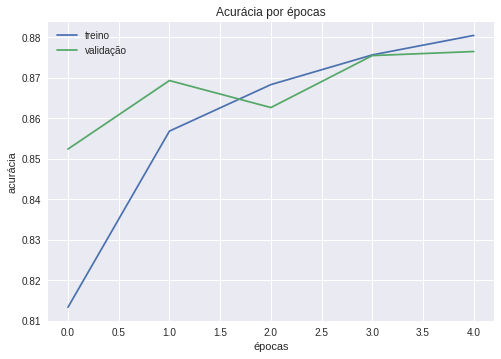

In [8]:
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])


Visualizando as perdas de treino e validação por época

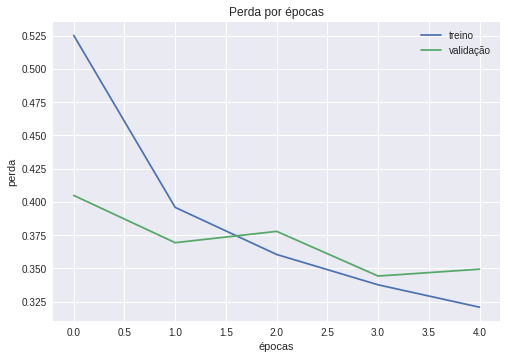

In [9]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

Testando o modelo e o modelo salvo

In [10]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

resultado teste: 2
número da imagem de teste: 2
resultado teste modelo salvo: 2
número da imagem de teste: 2


Avaliando o modelo

In [11]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

10000/10000 [==============================] - 0s 40us/step
Perda do teste: 2.2868376407623274
Acurácia do teste: 0.8565
